<a href="https://colab.research.google.com/github/ankit-rathi/Data-Science-with-Python/blob/master/Stock_Analysis/Nifty100_Stage_Analysis_Weekly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 7.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:

def plot_stock_buy_sell(stock_symbol):
  # Don't forget to import pandas_datareader exactly in this way
  import yfinance as yfin
  # Then replace this in for loop
  stock_df = yfin.Ticker(stock_symbol).history(period='2y',interval='1wk')[map(str.title, ['open', 'close', 'low', 'high', 'volume'])]
  stock_df['10WMA'] = round(stock_df['Close'].rolling(window = 10, min_periods = 1).mean(),0)
  stock_df['30WMA'] = round(stock_df['Close'].rolling(window = 30, min_periods = 1).mean(),0)

  import datetime
  end_date = datetime.date.today().strftime('%Y-%m-%d')
  start_date = (datetime.date.today() + datetime.timedelta(days=-500)).strftime('%Y-%m-%d')

  stock_df = stock_df[(stock_df.index <= end_date) & (stock_df.index >= start_date)]
  stock_df = stock_df.reset_index()
  stock_df['Date'] = stock_df['Date'].dt.date
  stock_df = stock_df.set_index('Date')

  import matplotlib.pyplot as plt
  # plot close price, short-term and long-term moving averages
  plt.figure(figsize = (30,10))
  plt.tick_params(axis = 'both', labelsize = 14)
  stock_df['Close'].plot(color = 'k', lw = 1, label = 'Close')  
  stock_df['30WMA'].plot(color = 'm', lw = 1, label = '30WMA')
  stock_df['10WMA'].plot(color = 'b', lw = 1, label = '10WMA')
  #stock_df['Volume'].plot(color = 'k', lw = 1, label = 'Volume')

  plt.grid()
  plt.show()

  # plot close price, short-term and long-term moving averages
  plt.figure(figsize = (30,3))
  plt.tick_params(axis = 'both', labelsize = 14)
  stock_df['Volume'].plot.bar(color = 'k', label = 'Volume')
  plt.grid()
  plt.show()

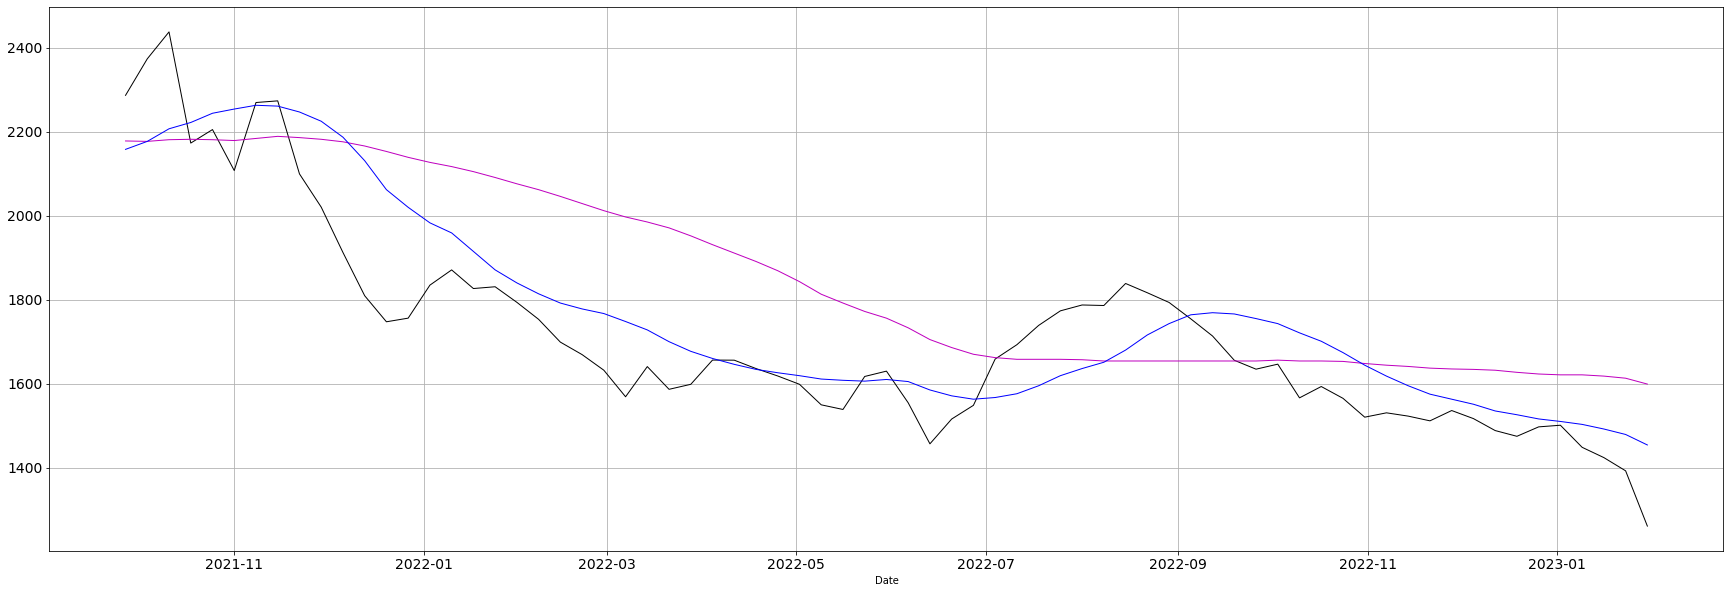

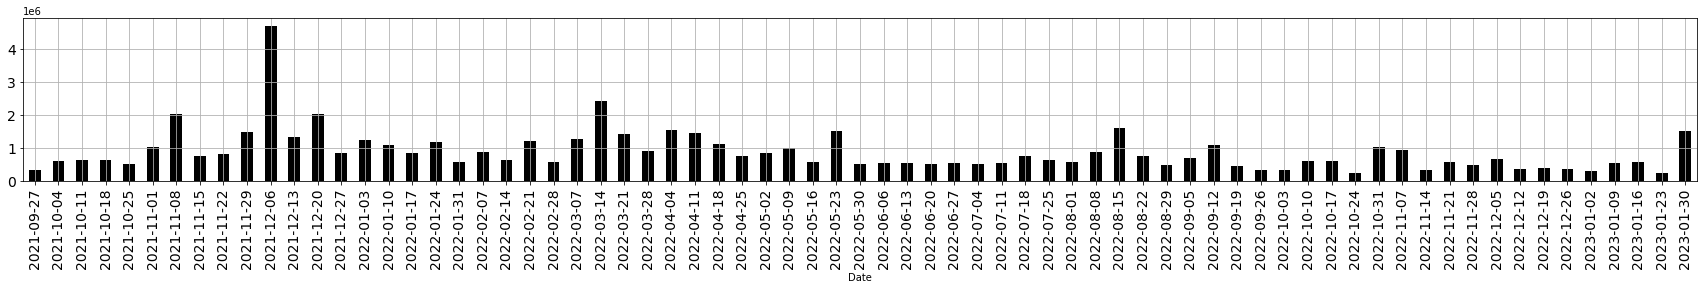

In [3]:
plot_stock_buy_sell('WHIRLPOOL.NS')